In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

%load_ext autoreload
%autoreload 2

os.chdir('/content/drive/MyDrive/PR_202210835/Lab06')

# 06. 해리스 코너 검출

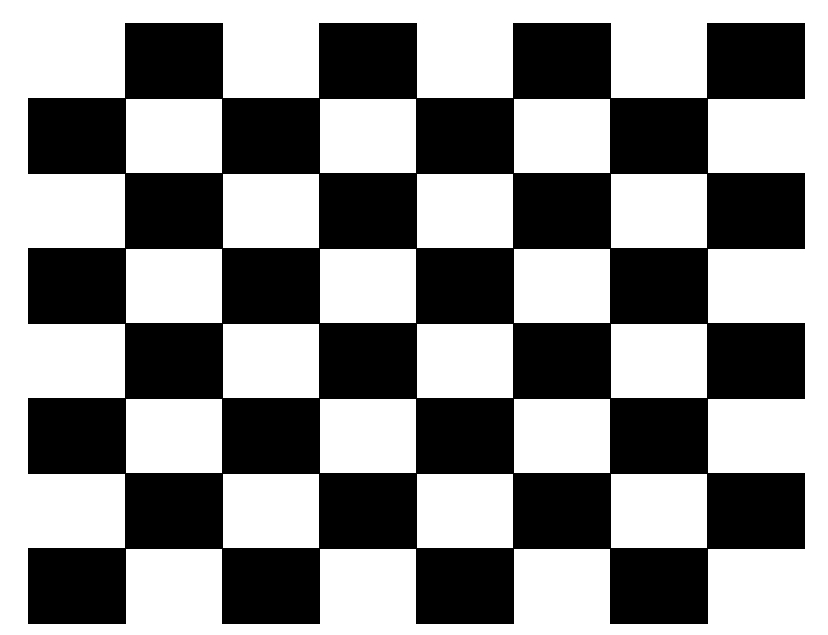

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# 이미지 로드
image = cv2.imread('image/chess.jpg', cv2.IMREAD_GRAYSCALE)

cv2_imshow(image)

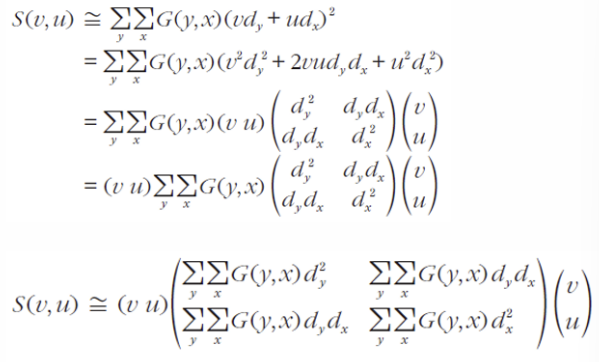

# Custom 구현

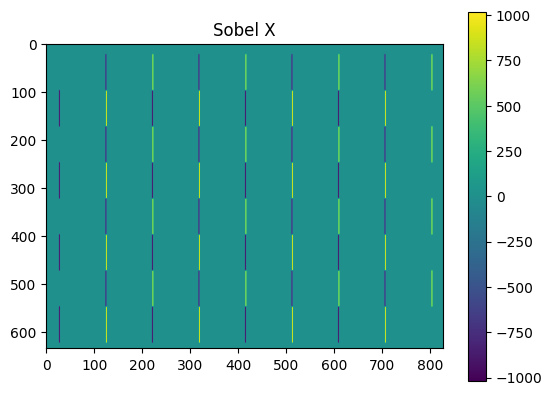

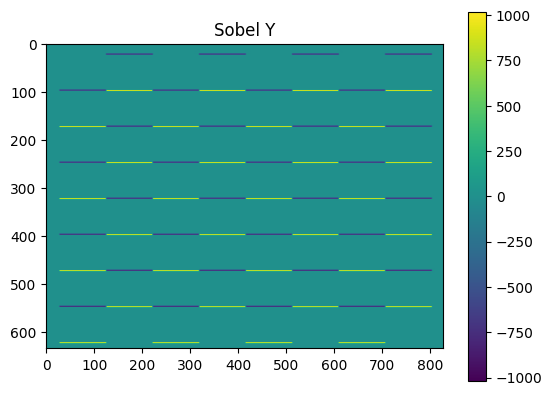

In [ ]:
# Sobel 필터를 이용해 x축과 y축 방향의 그래디언트 계산
sobel_x = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=3)

plt.imshow(sobel_x)
plt.colorbar()
plt.title('Sobel X')
plt.show()

plt.imshow(sobel_y)
plt.colorbar()
plt.title('Sobel Y')
plt.show()

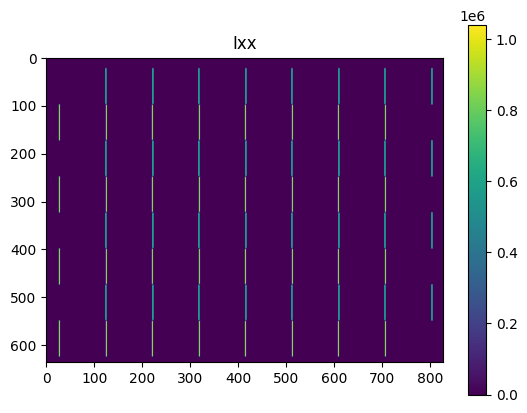

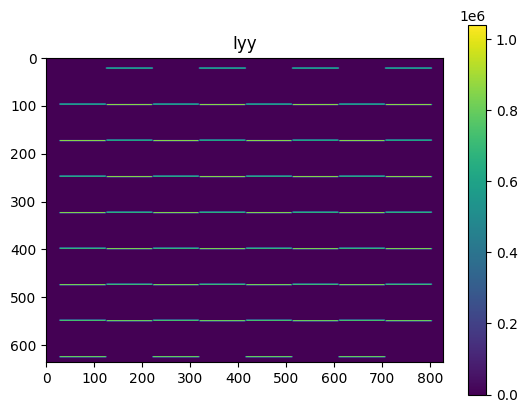

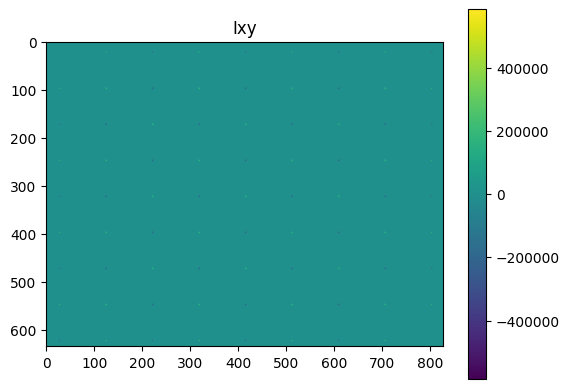

In [ ]:
# 행렬의 요소 계산
Ixx = sobel_x ** 2
Iyy = sobel_y ** 2
Ixy = sobel_x * sobel_y

plt.imshow(Ixx)
plt.title('Ixx')
plt.colorbar()
plt.show()

plt.imshow(Iyy)
plt.title('Iyy')
plt.colorbar()
plt.show()

plt.imshow(Ixy)
plt.title('Ixy')
plt.colorbar()
plt.show()

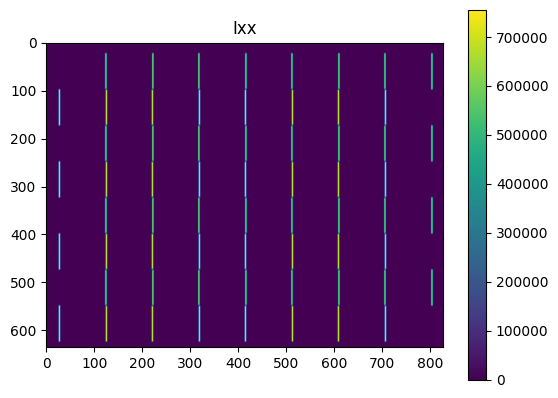

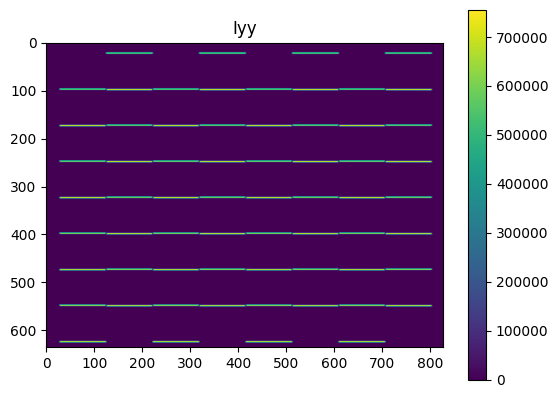

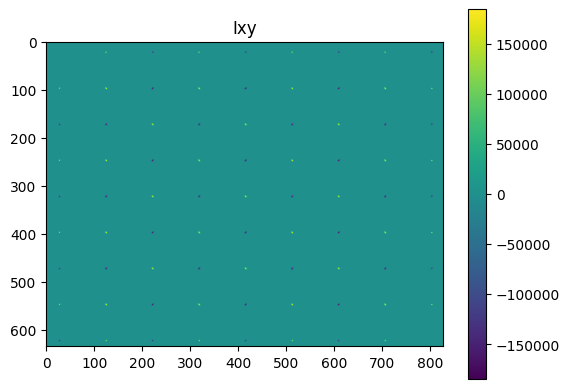

In [ ]:
# 가우시안 블러를 적용하여 각 요소들을 부드럽게 처리
Ixx = cv2.GaussianBlur(Ixx, (3, 3), sigmaX=1)
Iyy = cv2.GaussianBlur(Iyy, (3, 3), sigmaX=1)
Ixy = cv2.GaussianBlur(Ixy, (3, 3), sigmaX=1)

plt.imshow(Ixx)
plt.title('Ixx')
plt.colorbar()
plt.show()

plt.imshow(Iyy)
plt.title('Iyy')
plt.colorbar()
plt.show()

plt.imshow(Ixy)
plt.title('Ixy')
plt.colorbar()
plt.show()

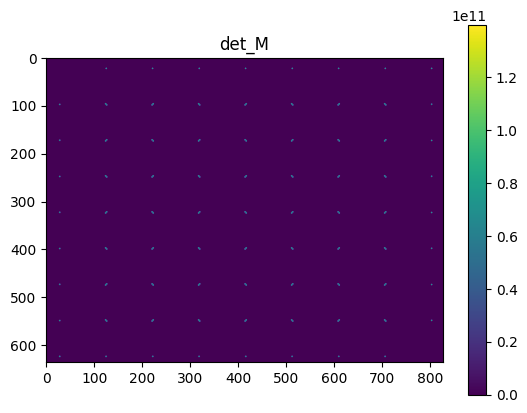

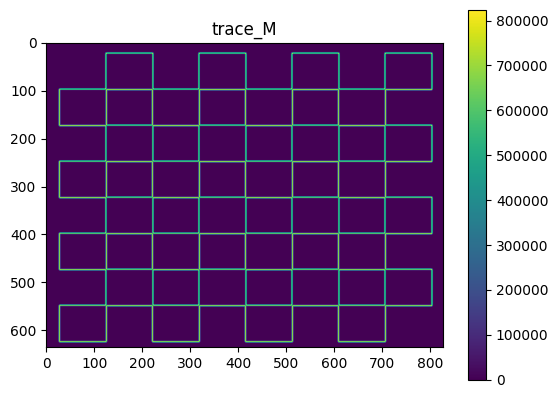

In [ ]:
# 행렬의 행렬식과 대각합 계산
det_M = Ixx * Iyy - Ixy ** 2 # A의 행렬식 값 구하
trace_M = Ixx + Iyy # 대각성분의 합

plt.imshow(det_M)
plt.title('det_M')
plt.colorbar()
plt.show()

plt.imshow(trace_M)
plt.title('trace_M')
plt.colorbar()
plt.show()

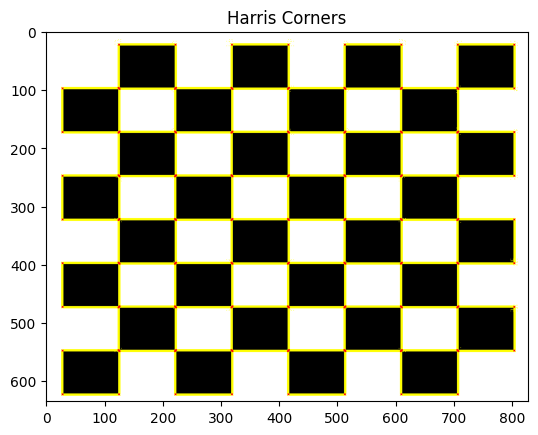

In [ ]:
# 해리스 응답 값 R 계산
k = 0.04
Cval =  det_M - k * trace_M ** 2

# 응답 값에 따라 코너 검출
threshold = 0.01 * Cval.max()
corners = np.zeros_like(Cval)
corners[Cval> threshold] = 255

# 코너는 빨간색, 엣지는 노란색으로 표시
corner_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
corner_image[Cval > threshold] = [0, 0, 255]  # 코너: Cval 값이 임계값 이상
corner_image[Cval < 0] = [0, 255, 255]   # 엣지: Cval 값이 음수인 경우

# 결과 출력
plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners')
plt.show()

# 내장함수 사용하기

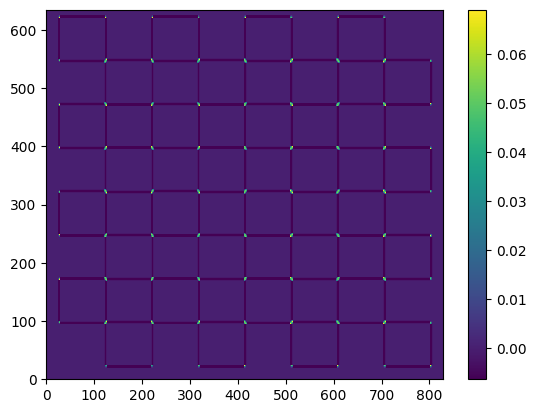

In [ ]:
c_map = cv2.cornerHarris(src=image,     # 입력 이미지, grayscale and float32
                            blockSize=5,  # 코너 검출 시 고려할 이웃의 크기
                            ksize=3,      # Sobel 마스크의 크기
                            k=0.04)       # 경험적 상수(0.04~0.06)

plt.pcolor(c_map)
plt.colorbar()
plt.show()

In [3]:
!jupyter nbconvert --to html Lab06.ipynb

[NbConvertApp] Converting notebook Lab06.ipynb to html
[NbConvertApp] Writing 1104920 bytes to Lab06.html
